In [1]:
# Import de Bibliotecas
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# NB Configuration

%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
plt.style.use(r'../../src/visualization/my_style.mplstyle')

In [3]:
path = r'../../data/raw/caso_full.csv.gz'
df = pd.read_csv(path)

In [4]:
df.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [5]:
# Variáveis categóricas
date_type_category = ['city', 'city_ibge_code', 'place_type','state']
df[date_type_category] = df[date_type_category].astype('category')

#Variáveis datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['last_available_date'] = pd.to_datetime(df['last_available_date'], format='%Y-%m-%d')

df = df.sort_values(by='date', ascending=True)

In [48]:
df_sp = df.query('state == "SP" and city == "São Paulo"')
df_cc = df.query('state == "CE" and city == "Fortaleza"')

In [49]:
# DataFrame de Americana-SP agrupoado por Semana Epidemiológica
df_sp_ew = df_sp.groupby('epidemiological_week').sum()
df_sp_ew = df_sp_ew.iloc[:-1]

df_sp_ew['date'] = df_sp.groupby('epidemiological_week').min()['date']
df_sp_ew = df_sp_ew.reset_index()

df_sp_ew.to_csv(r'../../data/processed/sp-por-semana-epidemiologica.csv')

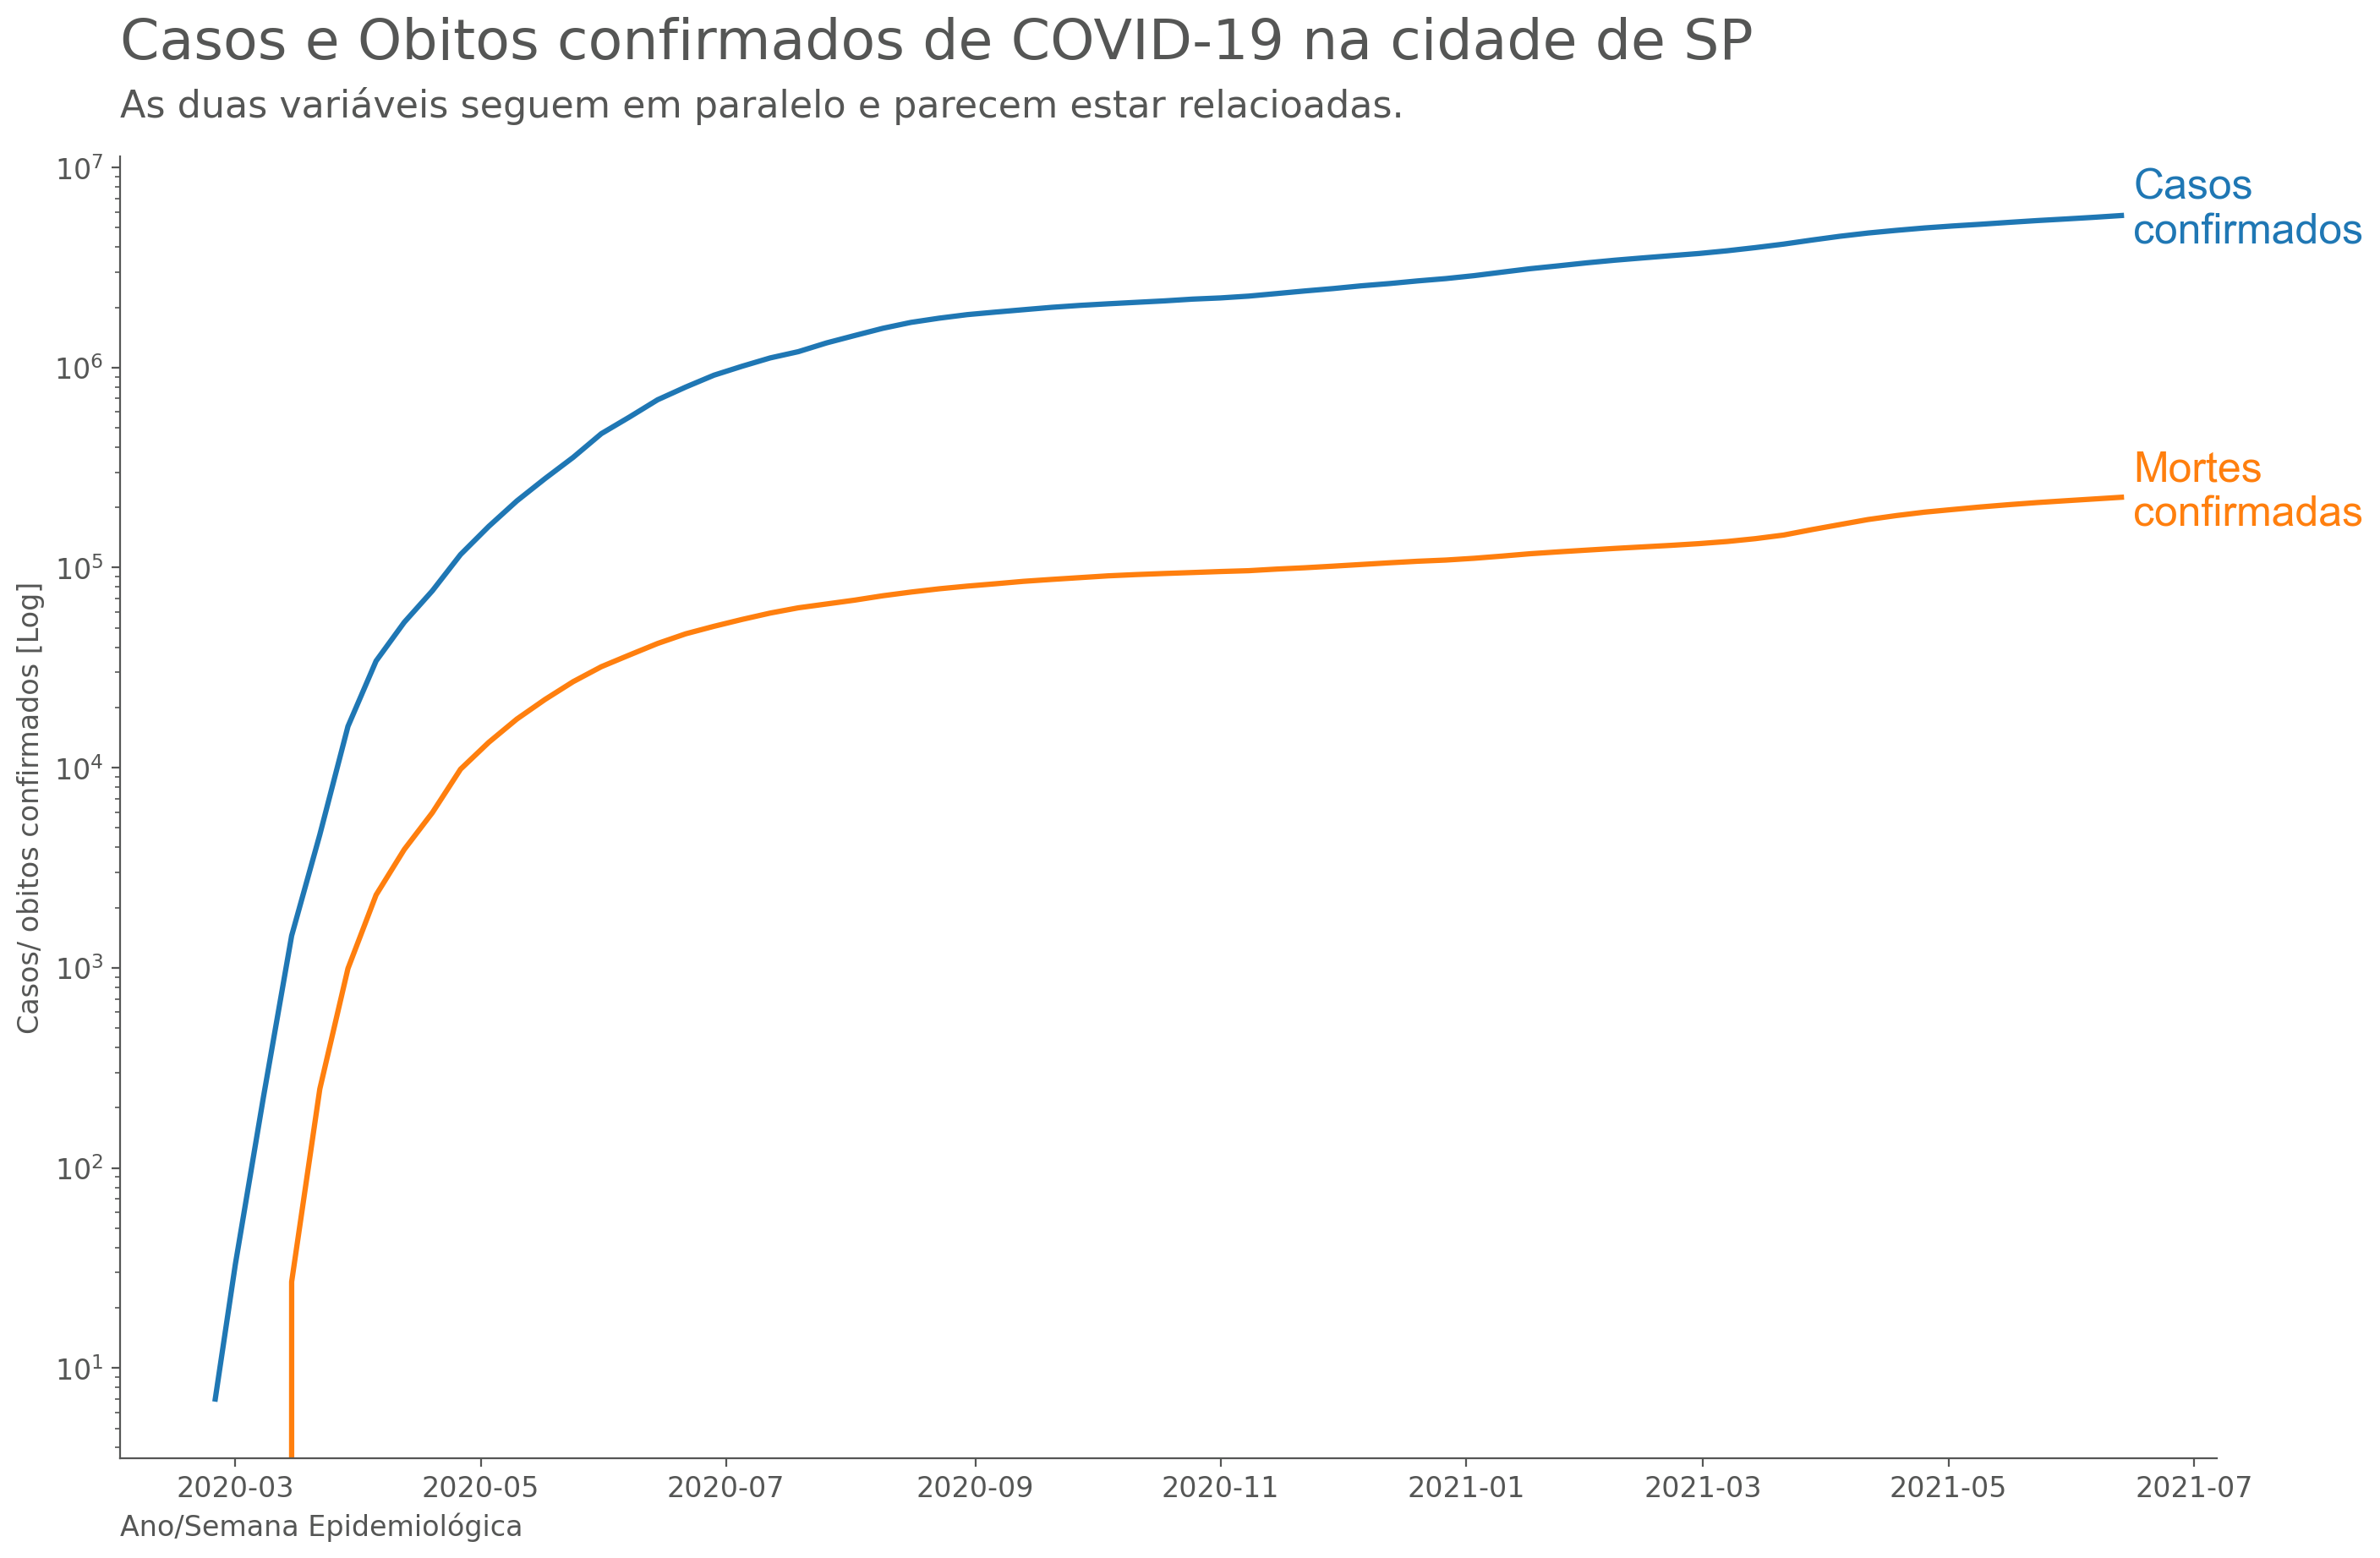

In [50]:
ax1=sns.lineplot(x='date',y='last_available_confirmed', data=df_sp_ew)
ax1.annotate(text='Casos\nconfirmados',
             xy=(df_sp_ew['date'].iloc[-1], df_sp_ew['last_available_confirmed'].iloc[-1]),
             xycoords='data',
             xytext=(5, -12),
             textcoords='offset points',
             color='#1f77b4',
             fontname = "Arial")

ax2 = sns.lineplot(x='date',y='last_available_deaths', data=df_sp_ew)
ax2 = plt.annotate(text='Mortes\nconfirmadas',
             xy=(df_sp_ew['date'].iloc[-1], df_sp_ew['last_available_deaths'].iloc[-1]),
             xycoords='data',
             xytext=(5, -12),
             textcoords='offset points',
             color='#ff7f0e',
             fontname = "Arial")
mpl.pyplot.yscale('log')
plt.title('Casos e Obitos confirmados de COVID-19 na cidade de SP\n')
plt.text(0,1.03, 'As duas variáveis seguem em paralelo e parecem estar relacioadas.', transform=ax1.transAxes, fontsize=16)
plt.xlabel('Ano/Semana Epidemiológica')
plt.ylabel('Casos/ obitos confirmados [Log]')
plt.savefig(r'../../reports/figures/casos-e-obitos-SP.png')

In [51]:
df_sp_ew['cfr'] = (df_sp_ew['last_available_deaths'] / df_sp_ew['last_available_confirmed']) * 100

df_cc_ew['cfr'] = (df_cc_ew['last_available_deaths'] / df_cc_ew['last_available_confirmed']) * 100

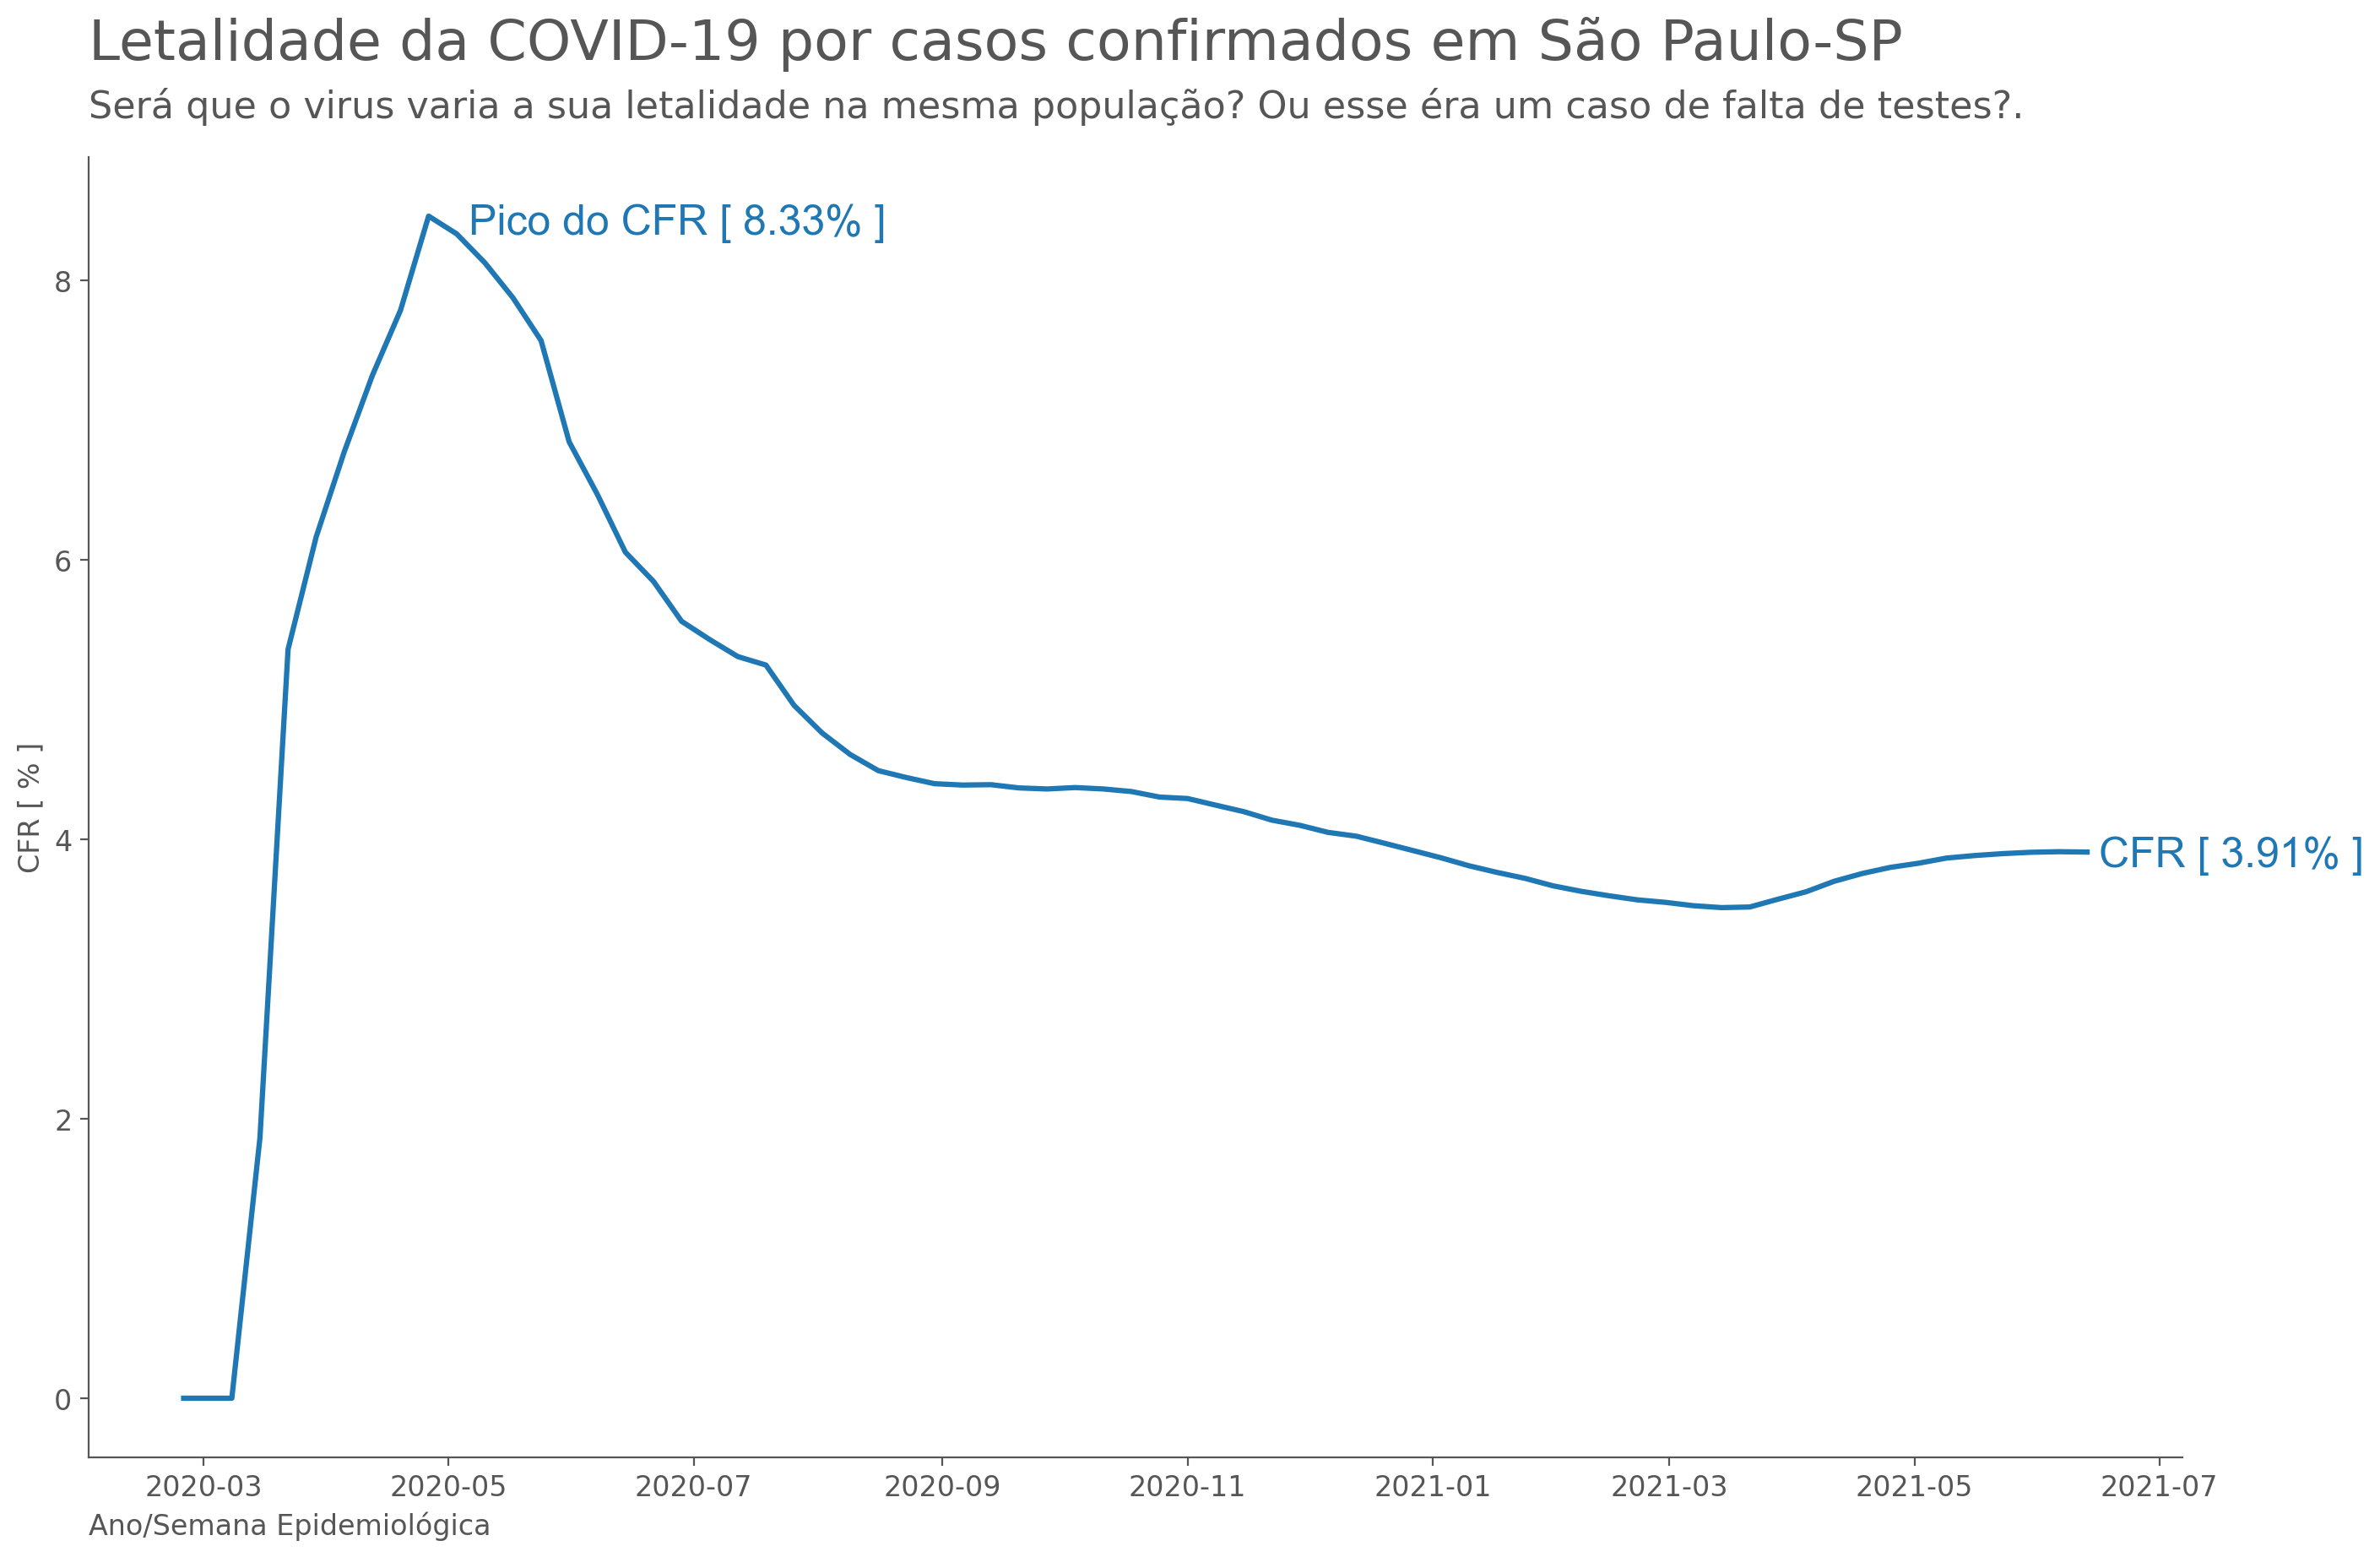

In [52]:
ax1=sns.lineplot(x='date',y='cfr', data=df_sp_ew)
ax1.annotate(text=f'CFR [ {df_sp_ew["cfr"].iloc[-1].round(2)}% ]',
             xy=(df_sp_ew['date'].iloc[-1], df_sp_ew['cfr'].iloc[-1]),
             xycoords='data',
             xytext=(5,-6),
             textcoords='offset points',
             color='#1f77b4',
             fontname = "Arial")
ax1.annotate(text=f'Pico do CFR [ {df_sp_ew["cfr"].iloc[10].round(2)}% ]',
             xy=(df_sp_ew['date'][10], df_sp_ew['cfr'].iloc[10]),
             xycoords='data',
             xytext=(5, 0),
             textcoords='offset points',
             color='#1f77b4',
             fontname = "Arial")
plt.title('Letalidade da COVID-19 por casos confirmados em São Paulo-SP\n')
plt.text(0,1.03, 'Será que o virus varia a sua letalidade na mesma população? Ou esse éra um caso de falta de testes?.', transform=ax1.transAxes, fontsize=16)
plt.xlabel('Ano/Semana Epidemiológica')
plt.ylabel('CFR [ % ]')
plt.savefig(r'../../reports/figures/CFR-SP.png')